In [1]:
import os # interacting with the operating system (Windows): navigate the filesystem
import pandas as pd # data handling, especially tabular data (like CSV, Excel, or experimental logs).
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

In [26]:
# ---------- Config ----------
base_dir = r"Y:\0_Ishraq\New Pool Boiling Video"
#The variable 'base_dir' stores the base directory path to the experimental data
csv_basename = "Boiling-{id}_csv_data.csv"   # inside folder Boiling-{id}

In [27]:
# ---------- Gather IDs + custom labels ----------
while True:
    try:
        n = int(input("How many Boiling IDs to compare? ").strip())
        if n <= 0:
            raise ValueError
        break
    except ValueError:
        print("Please enter a positive integer (e.g., 4).")

boiling_ids = []
extra_labels = {}  # maps id -> extra label

for i in range(n):
    bid = input(f"Enter Boiling ID #{i+1}: ").strip()
    while not bid:
        print("Empty input; try again.")
        bid = input(f"Enter Boiling ID #{i+1}: ").strip()

    # keep first occurrence if duplicate ID is entered again
    if bid not in boiling_ids:
        boiling_ids.append(bid)
        extra_labels[bid] = ""  # leave empty for now, will fill later
    else:
        print(f"Note: Boiling-{bid} already added; keeping the first label: '{extra_labels[bid]}'")

# ---------- Load data ----------
data_frames = {}  # id -> DataFrame
missing = []
for bid in boiling_ids:
    folder = os.path.join(base_dir, f"Boiling-{bid}")
    csv_path = os.path.join(folder, csv_basename.format(id=bid))
    if not os.path.isfile(csv_path):
        if os.path.isfile(os.path.join(folder, f"Boiling-{bid}_csv_data.csv")):
            csv_path = os.path.join(folder, f"Boiling-{bid}_csv_data.csv")
        else:
            missing.append((bid, csv_path))
            continue
    try:
        df = pd.read_csv(csv_path)
        data_frames[bid] = df
        print(f"Loaded Boiling-{bid}: {csv_path}")
    except Exception as e:
        print(f"Failed to load Boiling-{bid} ({csv_path}): {e}")

if missing:
    for bid, path in missing:
        print(f"⚠️  Missing file for Boiling-{bid}: {path}")
if not data_frames:
    raise RuntimeError("No CSVs could be loaded. Check paths/IDs and try again.")


Loaded Boiling-300: Y:\0_Ishraq\New Pool Boiling Video\Boiling-300\Boiling-300_csv_data.csv
Loaded Boiling-299: Y:\0_Ishraq\New Pool Boiling Video\Boiling-299\Boiling-299_csv_data.csv
Loaded Boiling-298: Y:\0_Ishraq\New Pool Boiling Video\Boiling-298\Boiling-298_csv_data.csv
Loaded Boiling-297: Y:\0_Ishraq\New Pool Boiling Video\Boiling-297\Boiling-297_csv_data.csv
Loaded Boiling-296: Y:\0_Ishraq\New Pool Boiling Video\Boiling-296\Boiling-296_csv_data.csv
Loaded Boiling-295: Y:\0_Ishraq\New Pool Boiling Video\Boiling-295\Boiling-295_csv_data.csv
Loaded Boiling-294: Y:\0_Ishraq\New Pool Boiling Video\Boiling-294\Boiling-294_csv_data.csv
Loaded Boiling-293: Y:\0_Ishraq\New Pool Boiling Video\Boiling-293\Boiling-293_csv_data.csv
Loaded Boiling-321: Y:\0_Ishraq\New Pool Boiling Video\Boiling-321\Boiling-321_csv_data.csv
Loaded Boiling-309: Y:\0_Ishraq\New Pool Boiling Video\Boiling-309\Boiling-309_csv_data.csv
Loaded Boiling-319: Y:\0_Ishraq\New Pool Boiling Video\Boiling-319\Boiling-319_c

In [28]:
raise Exception

Exception: 

In [29]:
# ---------- Add missing labels (if any) ----------
for bid in boiling_ids:
    if not extra_labels.get(bid):  # if label was not provided earlier
        extra = input(f"Enter extra label for Boiling-{bid} (optional, e.g., 'Microchannel A'): ").strip()
        extra_labels[bid] = extra

# ---------- Print summary ----------
print("\n✅ Final Boiling IDs and Labels:")
for bid in boiling_ids:
    label = extra_labels.get(bid, "")
    if label:
        print(f"Boiling-{bid}: {label}")
    else:
        print(f"Boiling-{bid}: [No Label]")


✅ Final Boiling IDs and Labels:
Boiling-300: 10kPa_120W
Boiling-299: 20kPa_120W
Boiling-298: 30kPa_130W
Boiling-297: 40kPa_140W
Boiling-296: 50kPa_150W
Boiling-295: 60kPa_160W
Boiling-294: 70kPa_170W
Boiling-293: 80kPa_180W
Boiling-321: 90kPa_200W
Boiling-309: 97.7kPa_200W
Boiling-319: 100kPa_220W


In [30]:
# Column names (as written in your CSVs)
Time_Therm = "Time_Thermocouple (seconds)"
Time_Press = "Time_Pressure (seconds)"

# Each tuple: (y_col, x_col, title, y_label, x_label, xlim, ylim, xchunk)
# Use None if you want autoscale
PLOTS = [  #y_col                           #x_col                                  #title                                               #y_label                         #x_label                         #x_lim          #y_lim            #tchunk            #y_tchunk   
    ("Surface Temperature (degC)",       Time_Therm,                           "1_Surface Temperature vs Time",                     "Surface Temperature (°C)",           "Time (s)",                       (0,None),       None,               None,             None),
    ("Heat Flux (W/cm^2)",               Time_Therm,                           "2_Heat Flux vs Time",                               "Heat Flux (W/cm²)",                  "Time (s)",                       (0,None),       None,               None,             None),
    ("HTC (W/cm^2.K)",                   Time_Therm,                           "3_HTC vs Time",                                     "HTC (W/cm²·K)",                      "Time (s)",                       (0, None),     (0, 12),             None,             (30,None),),
    ("Surface Temperature_cut (degC)",   Time_Therm,                           "4_Surface Temperature vs Time (up to CHF)",         "Surface Temperature (°C)",           "Time (s)",                       (0, None),      None,               None,             None),
    ("Heat Flux_cut (W/cm^2)",           Time_Therm,                           "5_Heat Flux vs Time (up to CHF)",                   "Heat Flux (W/cm²)",                  "Time (s)",                       (0, None),      None,               None,             None), 
    ("HTC_cut (W/cm^2.K)",               Time_Therm,                           "6_HTC vs Time (up to CHF)",                         "HTC (W/cm²·K)",                      "Time (s)",                       (0, None),     (0, 12),            None,             (30,None),),
    ("Heat Flux (W/cm^2)",               "Surface Temperature (degC)",         "7_Heat Flux vs Surface Temperature",                "Heat Flux (W/cm²)",                  "Surface Temperature (°C)",       None,           None,               None,             None),
    ("Heat Flux (W/cm^2)",               "Wall Superheat (degC)",              "8_Heat Flux vs Wall Superheat",                     "Heat Flux (W/cm²)",                  "Wall Superheat (°C)",            None,           None,               None,             None),
    ("Heat Flux_cut (W/cm^2)",           "Surface Temperature_cut (degC)",     "9_Heat Flux vs Surface Temperature (up to CHF)",    "Heat Flux (W/cm²)",                  "Surface Temperature (°C)",       None,           None,               None,             None),
    ("Heat Flux_cut (W/cm^2)",           "Wall Superheat_cut (degC)",          "10_Heat Flux vs Wall Superheat (up to CHF)",        "Heat Flux (W/cm²)",                  "Wall Superheat (°C)",            None,           None,               None,            None),
    ("HTC (W/cm^2.K)",                   "Surface Temperature (degC)",         "11_HTC vs Surface Temperature",                     "HTC (W/cm²·K)",                      "Surface Temperature (°C)",       None,           (0, 12),            None,            (30,None),),
    ("HTC (W/cm^2.K)",                   "Wall Superheat (degC)",              "12_HTC vs Wall Superheat",                          "HTC (W/cm²·K)",                      "Wall Superheat (°C)",            None,           (0, 12),            None,            (30,None),),
    ("HTC_cut (W/cm^2.K)",               "Surface Temperature_cut (degC)",     "13_HTC vs Surface Temperature (up to CHF)",         "HTC (W/cm²·K)",                      "Surface Temperature (°C)",       None,           (0, 12),            None,            (30,None),),
    ("HTC_cut (W/cm^2.K)",               "Wall Superheat_cut (degC)",          "14_HTC vs Wall Superheat (up to CHF)",              "HTC (W/cm²·K)",                      "Wall Superheat (°C)",            None,           (0, 12),            None,            (30,None),),
    ("HTC_cut (W/cm^2.K)",               "Heat Flux_cut (W/cm^2)",             "15_Boiling Curve (up to CHF)",                      "HTC (W/cm²·K)",                      "Heat Flux (W/cm²)",              None,            (0, 12),           None,            (30,None),),
    ("Pressure (kPa)",                   Time_Press,                           "16_Pressure vs Time",                               "Pressure (kPa)",                     "Time (s)",                       (0,None),        None,              None,             None),
]



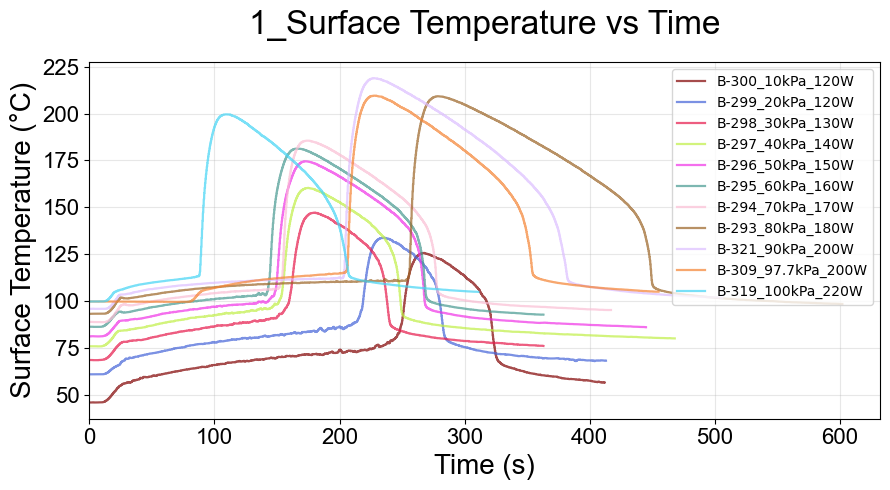

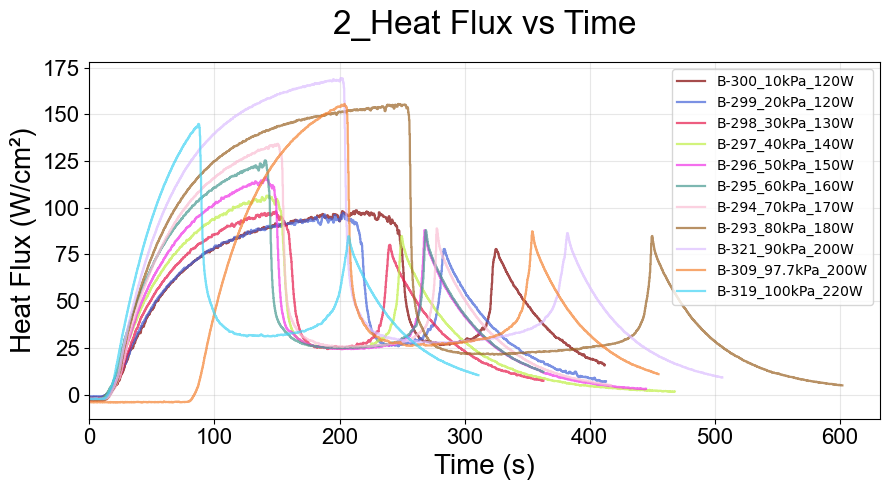

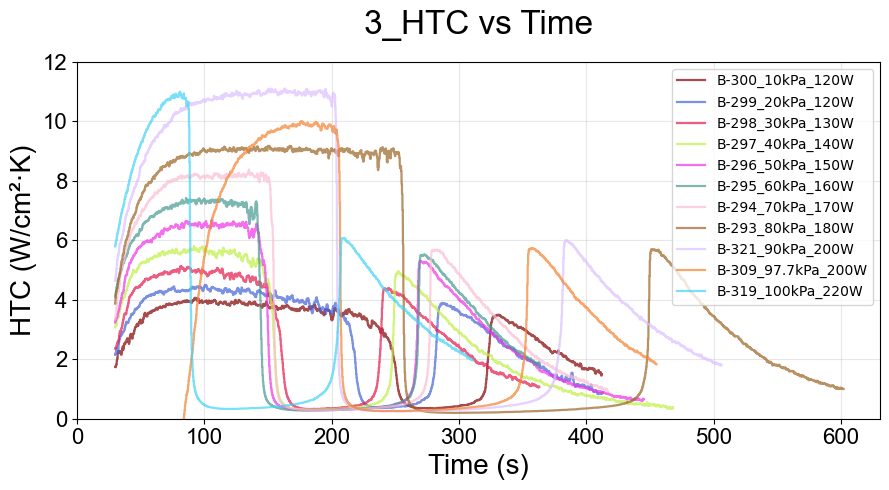

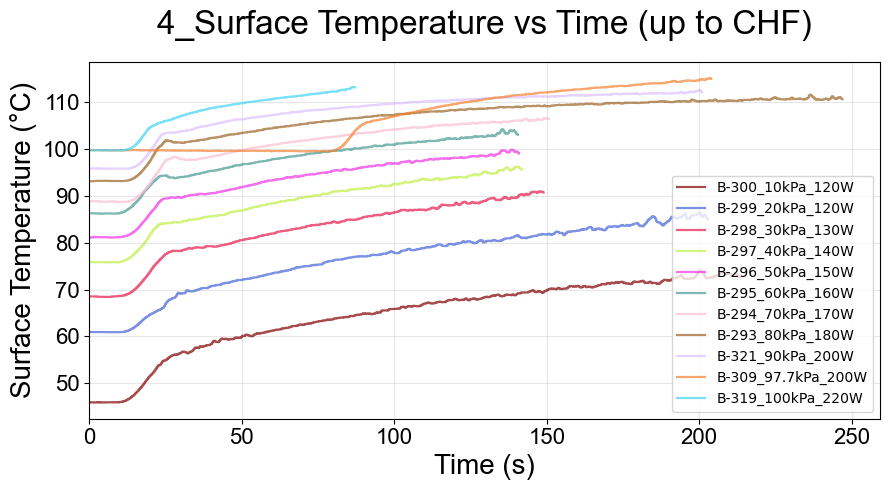

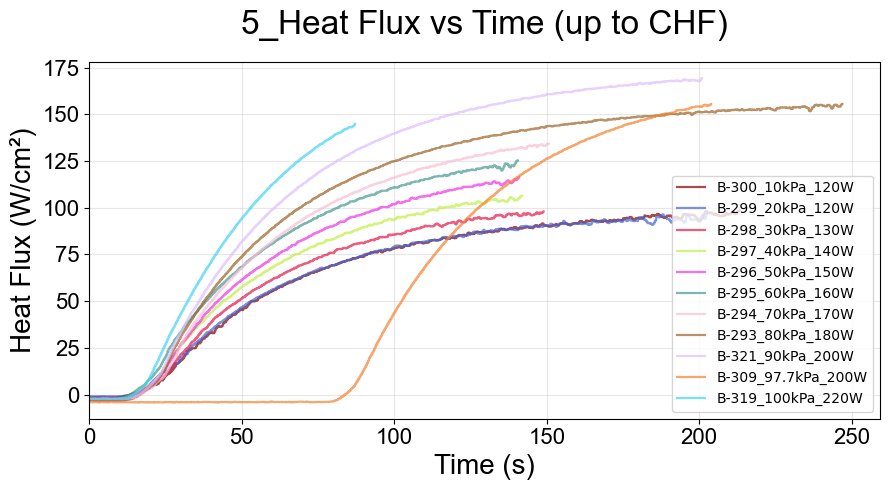

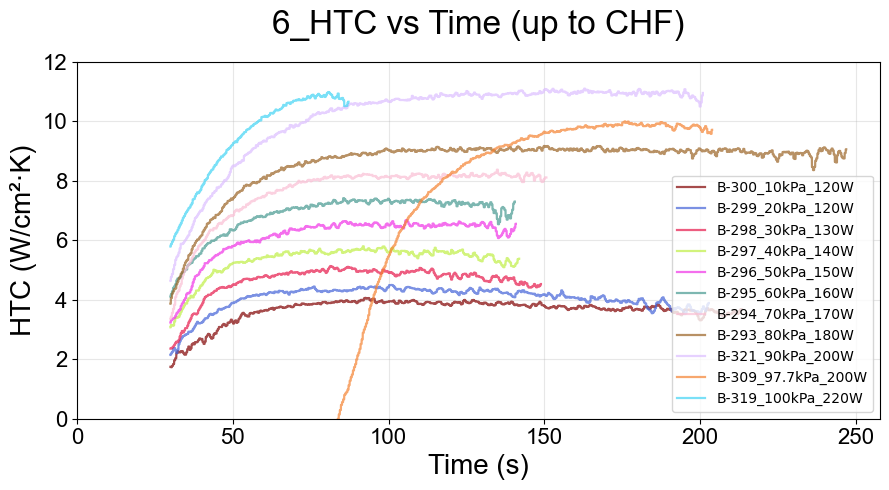

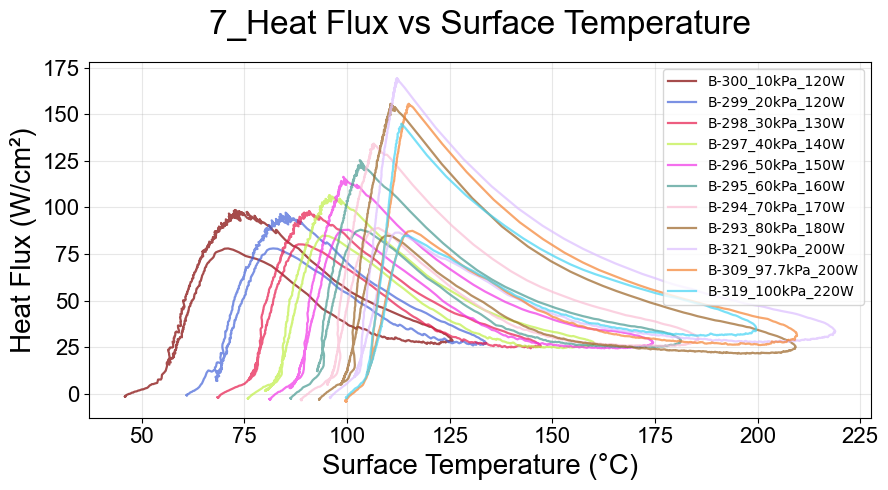

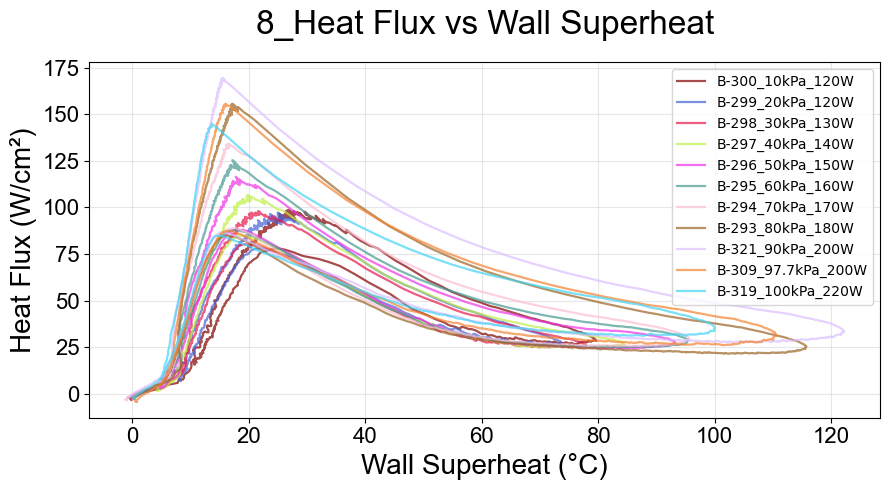

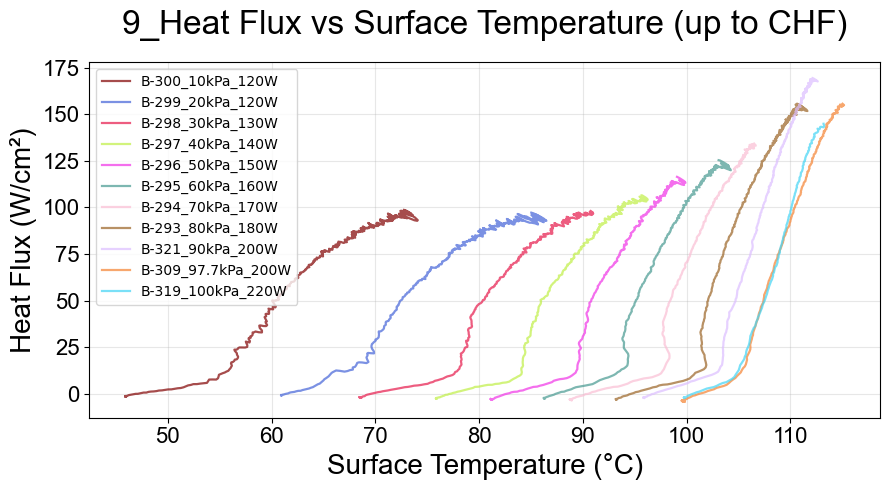

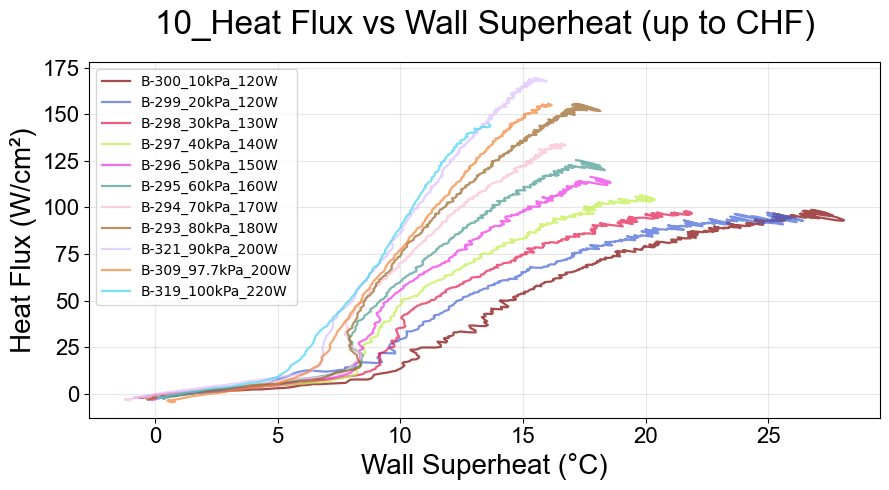

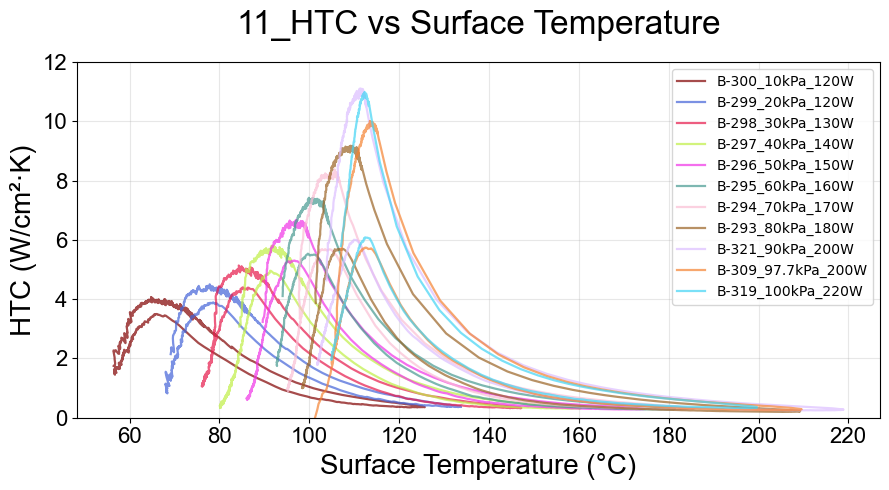

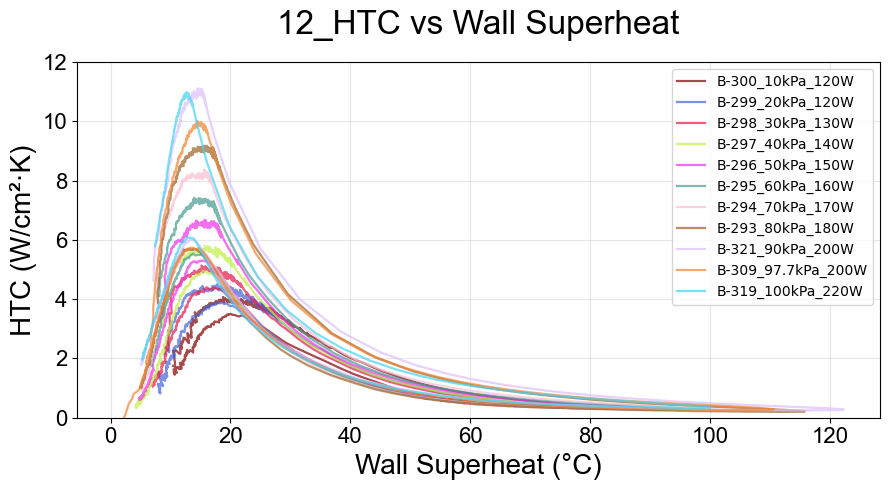

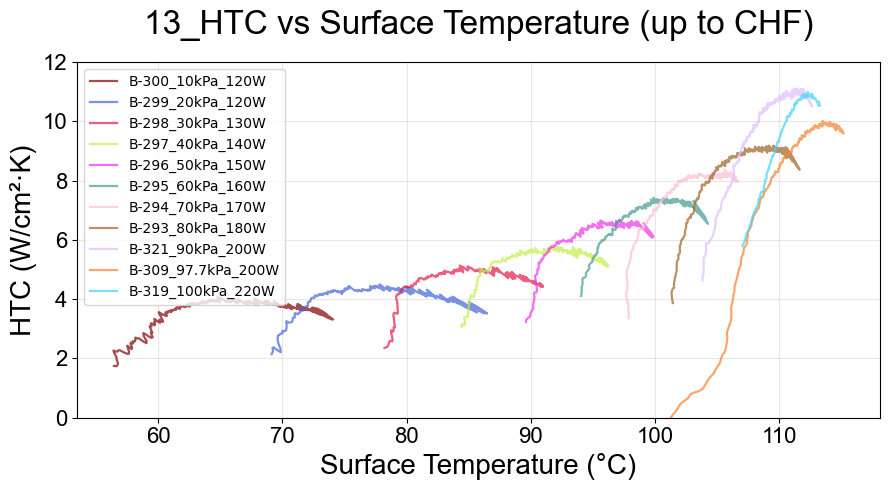

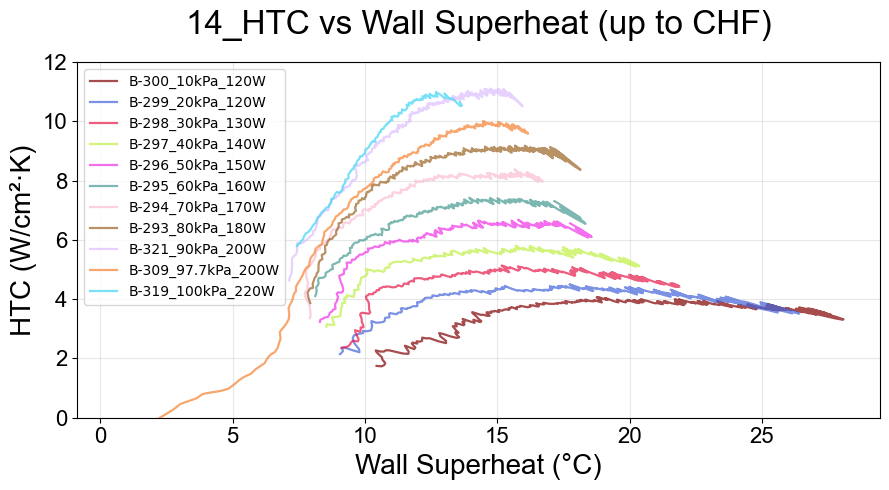

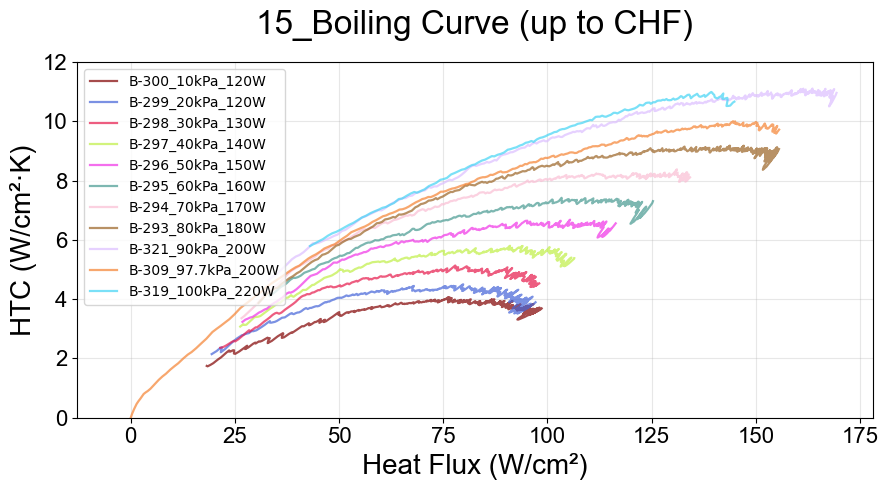

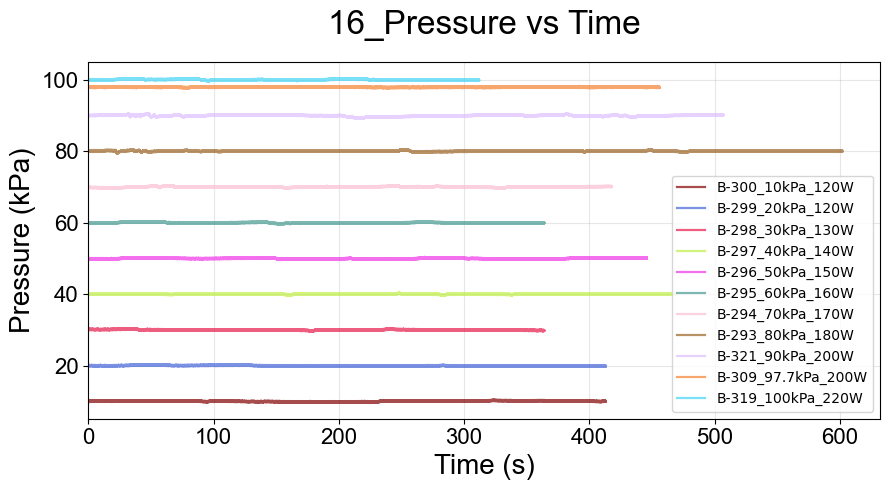

In [31]:
# ---------- Plot ----------
saved_figures = []  # store (title, figure) pairs

'''
# ---------- Colors: consistent per ID across all plots ----------
from matplotlib.cm import get_cmap

cmap = get_cmap("tab10")  # distinct palette (repeats after 10)
color_map = {bid: cmap(i % 10) for i, bid in enumerate(boiling_ids)}
'''
# ---------- Colors: your custom ordered palette (no black) ----------
PALETTE = [
    "#800000",  # maroon
    "#4363d8",  # blue
    "#e6194b",  # red
    "#bfef45",  # lime
    "#f032e6",  # magenta
    "#469990",  # teal
    "#fabed4",  # pink
    "#9A6324",  # brown
    "#dcbeff",  # lavender
    "#f58231",  # orange
    "#42d4f4",  # cyan
    "#808000",  # olive
    "#ffe119",  # yellow
    "#3cb44b",  # green
    "#aaffc3",  # mint
    "#000075",  # navy
    "#911eb4",  # purple

]

# Deterministic mapping: first ID -> first color, etc. (cycles if more IDs than colors)
color_map = {bid: PALETTE[i % len(PALETTE)] for i, bid in enumerate(boiling_ids)}

def _infer_time_col(x_col, Time_Therm, Time_Press):
    # If the x-axis is pressure-time, use pressure time; otherwise default to thermocouple time
    return Time_Press if x_col == Time_Press else Time_Therm

def _parse_time_chunk(chunk, x_col, Time_Therm, Time_Press):
    """
    Accepts:
      - None
      - (tmin, tmax)
      - (tcol, tmin, tmax)   # tcol is a string column name
    Returns a normalized triple: (tcol, tmin, tmax) or (None, None, None)
    """
    if not chunk:
        return (None, None, None)

    if isinstance(chunk, tuple):
        if len(chunk) == 2:
            tmin, tmax = chunk
            tcol = _infer_time_col(x_col, Time_Therm, Time_Press)
            return (tcol, tmin, tmax)
        elif len(chunk) == 3 and isinstance(chunk[0], str):
            tcol, tmin, tmax = chunk
            return (tcol, tmin, tmax)

    # Fallback: disable if malformed
    return (None, None, None)

def _apply_time_window(df_in, tcol, tmin, tmax):
    """Filter rows in df_in by time column tcol within [tmin, tmax] (inclusive)."""
    if tcol is None or tcol not in df_in.columns:
        return df_in
    mask = pd.Series(True, index=df_in.index)
    if tmin is not None:
        mask &= df_in[tcol] >= tmin
    if tmax is not None:
        mask &= df_in[tcol] <= tmax
    return df_in[mask]

for spec in PLOTS:
    # Backward-compatible unpack (7 items), plus optional time-based windows:
    # spec can be:
    #   (y_col, x_col, title, y_label, x_label, xlim, ylim)
    #   (y_col, x_col, title, y_label, x_label, xlim, ylim, tchunk)
    #   (y_col, x_col, title, y_label, x_label, xlim, ylim, tchunk, y_tchunk)
    if len(spec) == 7:
        y_col, x_col, title, y_label, x_label, xlim, ylim = spec
        tchunk = None
        y_tchunk = None
    elif len(spec) == 8:
        y_col, x_col, title, y_label, x_label, xlim, ylim, tchunk = spec
        y_tchunk = None
    else:
        y_col, x_col, title, y_label, x_label, xlim, ylim, tchunk, y_tchunk = spec

    fig = plt.figure(figsize=(9, 5))
    for bid in boiling_ids:
        if bid not in data_frames:
            continue
        df = data_frames[bid]

        # Check required columns exist (x, y must exist)
        if x_col not in df.columns or y_col not in df.columns:
            print(f"⚠️  Boiling-{bid} missing column(s): {x_col} or {y_col}. Skipping in '{title}'.")
            continue

        # Determine which time columns we need for filtering
        # Primary time window 'tchunk' is keyed to x_col (unless tcol explicitly passed)
        tcol_x, tmin_x, tmax_x = _parse_time_chunk(tchunk, x_col, Time_Therm, Time_Press)
        # Optional secondary time window 'y_tchunk' (same idea, but let it key off y_col if you want to override)
        tcol_y, tmin_y, tmax_y = _parse_time_chunk(y_tchunk, x_col, Time_Therm, Time_Press)  # key off x_col by default

        # Build the minimal dataframe we need (include any time cols required)
        need_cols = {x_col, y_col}
        if tcol_x: need_cols.add(tcol_x)
        if tcol_y: need_cols.add(tcol_y)

        plot_df = df[list(need_cols)].dropna(subset=[x_col, y_col])

        # Apply time-based filtering (intersection if both provided)
        if tcol_x:
            plot_df = _apply_time_window(plot_df, tcol_x, tmin_x, tmax_x)
        if tcol_y:
            plot_df = _apply_time_window(plot_df, tcol_y, tmin_y, tmax_y)

        if plot_df.empty:
            continue

        label_text = f"B-{bid}" if not extra_labels.get(bid) else f"B-{bid}_{extra_labels[bid]}"
        plt.plot(
            plot_df[x_col].values,
            plot_df[y_col].values,
            label=label_text,
            color=color_map[bid],
            linewidth=1.6,
            alpha=0.7,
        )

    plt.title(title, fontsize=24, fontname='Arial', pad=20)
    plt.xlabel(x_label, fontsize=20, fontname='Arial')
    plt.ylabel(y_label, fontsize=20, fontname='Arial')
    plt.xticks(fontsize=16, fontname='Arial')                            # x-tick font
    plt.yticks(fontsize=16, fontname='Arial') 
    if xlim: plt.xlim(xlim)
    if ylim: plt.ylim(ylim)
    plt.grid(True, alpha=0.3)
    plt.legend(loc="best", frameon=True)
    plt.tight_layout()

    saved_figures.append((title, fig))


plt.show()

In [32]:
raise Exception

Exception: 

In [33]:
# ---------- Save Figures ----------
import re

def _safe(name):
    """Make filenames safe by replacing non-alphanumeric chars with underscores"""
    return re.sub(r'[^A-Za-z0-9_.-]+', '_', name)

# 🔹 Set your own directory here
plots_folder = r"C:\Users\mh272\Box\NED3_Share\Ishraq Hossain\Weekly Meeting - Presentation\45th Meeting\MP Cu"   # <-- change this to your desired folder path
os.makedirs(plots_folder, exist_ok=True)

for name, fig in saved_figures:
    filename = os.path.join(plots_folder, f"{_safe(name)}.png")
    fig.savefig(filename, dpi=300, bbox_inches='tight')
    print("✅ Saved:", filename)

✅ Saved: C:\Users\mh272\Box\NED3_Share\Ishraq Hossain\Weekly Meeting - Presentation\45th Meeting\MP Cu\1_Surface_Temperature_vs_Time.png
✅ Saved: C:\Users\mh272\Box\NED3_Share\Ishraq Hossain\Weekly Meeting - Presentation\45th Meeting\MP Cu\2_Heat_Flux_vs_Time.png
✅ Saved: C:\Users\mh272\Box\NED3_Share\Ishraq Hossain\Weekly Meeting - Presentation\45th Meeting\MP Cu\3_HTC_vs_Time.png
✅ Saved: C:\Users\mh272\Box\NED3_Share\Ishraq Hossain\Weekly Meeting - Presentation\45th Meeting\MP Cu\4_Surface_Temperature_vs_Time_up_to_CHF_.png
✅ Saved: C:\Users\mh272\Box\NED3_Share\Ishraq Hossain\Weekly Meeting - Presentation\45th Meeting\MP Cu\5_Heat_Flux_vs_Time_up_to_CHF_.png
✅ Saved: C:\Users\mh272\Box\NED3_Share\Ishraq Hossain\Weekly Meeting - Presentation\45th Meeting\MP Cu\6_HTC_vs_Time_up_to_CHF_.png
✅ Saved: C:\Users\mh272\Box\NED3_Share\Ishraq Hossain\Weekly Meeting - Presentation\45th Meeting\MP Cu\7_Heat_Flux_vs_Surface_Temperature.png
✅ Saved: C:\Users\mh272\Box\NED3_Share\Ishraq Hossain\W

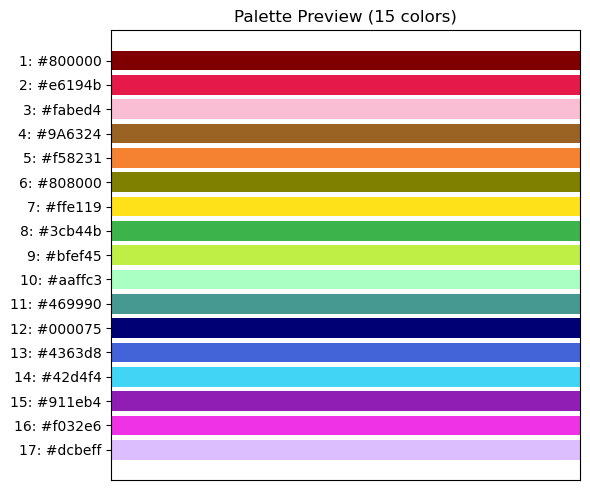

In [ ]:
import matplotlib.pyplot as plt

# ---------- Colors: your custom ordered palette (no black) ----------
PALETTE = [
    "#800000",  # maroon
    "#e6194b",  # red
    "#fabed4",  # pink
    "#9A6324",  # brown
    "#f58231",  # orange
    "#808000",  # olive
    "#ffe119",  # yellow
    "#3cb44b",  # green
    "#bfef45",  # lime
    "#aaffc3",  # mint
    "#469990",  # teal
    "#000075",  # navy
    "#4363d8",  # blue
    "#42d4f4",  # cyan
    "#911eb4",  # purple
    "#f032e6",  # magenta
    "#dcbeff",  # lavender
]

# Deterministic mapping: first ID -> first color, etc. (cycles if more IDs than colors)
color_map = {bid: PALETTE[i % len(PALETTE)] for i, bid in enumerate(boiling_ids)}

fig, ax = plt.subplots(figsize=(6, 5))
ax.barh(range(len(PALETTE)), [1]*len(PALETTE), color=PALETTE, edgecolor="none")
ax.set_yticks(range(len(PALETTE)))
ax.set_yticklabels([f"{i+1}: {c}" for i, c in enumerate(PALETTE)])
ax.set_xticks([])
ax.set_xlim(0, 1)
ax.invert_yaxis()
ax.set_title("Palette Preview (15 colors)")
plt.tight_layout()
plt.show()

C:\Users\mh272\AppData\Local\Temp\ipykernel_27960\2952655871.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("tab20")
C:\Users\mh272\AppData\Local\Temp\ipykernel_27960\2952655871.py:22: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


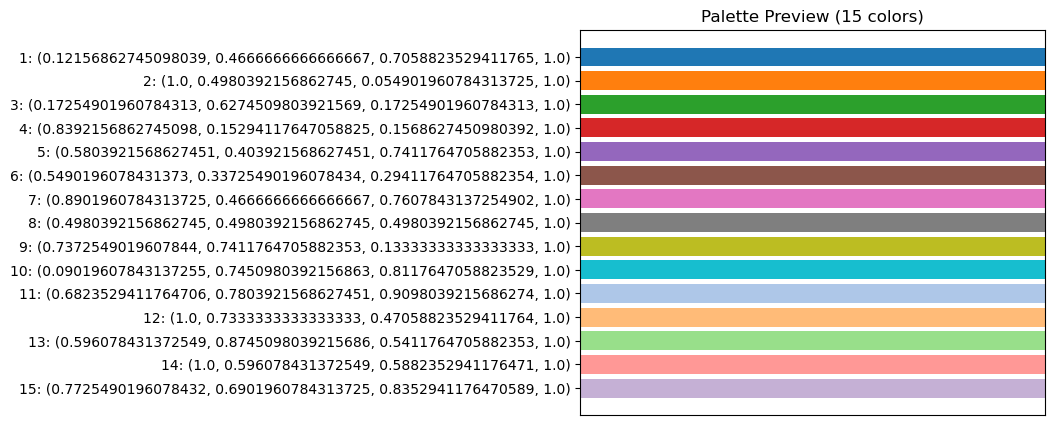

In [ ]:
from matplotlib.cm import get_cmap

# Use tab20 but pick non-adjacent entries to avoid the light/dark pairs
cmap = get_cmap("tab20")

# 15 distinct picks from tab20 (skip neighbors to avoid similar pairs)
indices = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 1, 3, 5, 7, 9]

PALETTE = [cmap(i) for i in indices]  # RGBA tuples from tab20

# Deterministic mapping: first ID -> first color, etc. (cycles if more IDs)
color_map = {bid: PALETTE[i % len(PALETTE)] for i, bid in enumerate(boiling_ids)}

fig, ax = plt.subplots(figsize=(6, 5))
ax.barh(range(len(PALETTE)), [1]*len(PALETTE), color=PALETTE, edgecolor="none")
ax.set_yticks(range(len(PALETTE)))
ax.set_yticklabels([f"{i+1}: {c}" for i, c in enumerate(PALETTE)])
ax.set_xticks([])
ax.set_xlim(0, 1)
ax.invert_yaxis()
ax.set_title("Palette Preview (15 colors)")
plt.tight_layout()
plt.show()